<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 5 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Optimisez la gestion des données de boutique avec R ou Python</h2>
</div>


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
# Importation de Pandas
import pandas as pd
import matplotlib.pyplot as plt # Pour créer des graphiques 
import numpy as np # la manipulation de tableaux et la réalisation de calculs numériques
from scipy import stats # accéder à de nombreuses fonctions statistiques et distributions de probabilité fournies

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
# Importation du fichier erp
df_erp = pd.read_excel('Fichier_erp.xlsx')
# Importation du fichier liaison
df_liaison = pd.read_excel('fichier_liaison.xlsx')
# Importation du fichier web
df_web = pd.read_excel('Fichier_web.xlsx')

C:\Users\33621\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\33621\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\33621\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyses des fichiers </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier liaison</h3>
</div>

In [3]:
# Nombre de lignes et de colonnes pour liaison
print('nombre de lignes:', df_liaison.shape[0])
print('nombre de colonnes:', df_liaison.shape[1])

nombre de lignes: 825
nombre de colonnes: 2


In [4]:
# Renommer la colonne "id_web" en "sku" 
df_liaison.rename(columns={"id_web": "sku"}, inplace=True)

In [5]:
# Regarder le pourcentage des éléments nulles dans chaque colonne 
df_liaison.apply(lambda x:x.isnull().value_counts(normalize=True))

,product_id,sku
False,1.0,0.889697
True,NaN,0.110303


In [6]:
# Colonne product_id est nulle
df_liaison[df_liaison.product_id.isnull()]

,product_id,sku


In [7]:
# Regarder le nombre de valeurs nulles dans chaque colonne
df_liaison.isna().value_counts()

product_id  sku  
False       False    734
            True      91
dtype: int64

In [8]:
# Conserver uniquement les lignes où la colonne sku est renseignée
df_liaison = df_liaison[~df_liaison['sku'].isna()] # ~ pour inverser les valeurs booléennes

# Réindexer le DataFrame si nécessaire
df_liaison.reset_index(drop=True, inplace=True)

df_liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
729,7023,15891
730,7025,15887
731,7247,13127-1
732,7329,14680-1


In [9]:
# Regarder si 'product_id' est unique 
def tester_unicite(df, col):
    res = df[col].nunique() == df.shape[0]
    return res
tester_unicite(df_liaison, 'product_id')

True

In [10]:
# Regarder si 'sku' est unique 
tester_unicite(df_liaison, 'sku')

True

In [11]:
df_liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
729,7023,15891
730,7025,15887
731,7247,13127-1
732,7329,14680-1


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier web</h3>
</div>

In [12]:
# Nombre de lignes et de colonnes pour web
print('nombre de lignes:', df_web.shape[0])
print('nombre de colonnes:', df_web.shape[1])

nombre de lignes: 1513
nombre de colonnes: 28


In [13]:
# Regarder les colonnes du df_web 
df_web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [14]:
# Regarder le pourcentage des éléments nulles dans chaque colonne 
df_web.apply(lambda x:x.isnull().value_counts(normalize=True))

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
False,0.94382,1.0,1.0,1.0,0.945142,0.945142,0.473232,NaN,0.945142,0.945142,...,0.945142,0.945142,0.945142,NaN,0.945142,0.945142,0.945142,0.945142,0.47191,0.945142
True,0.05618,NaN,NaN,NaN,0.054858,0.054858,0.526768,1.0,0.054858,0.054858,...,0.054858,0.054858,0.054858,1.0,0.054858,0.054858,0.054858,0.054858,0.52809,0.054858


In [15]:
# Filtrer les lignes avec des valeurs manquantes dans la colonne 'sku
df_web[df_web.sku.isnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Compter les valeurs manquantes dans la colonne 'total_sales'
df_web[df_web.sku.isnull()]['total_sales'].isnull().value_counts()

True     83
False     2
Name: total_sales, dtype: int64

In [17]:
# Filtrer les lignes où 'sku' est nulle ET 'total_sales' n'est pas nulle
df_web[df_web.sku.isnull() & df_web.total_sales.notnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
353,NaN,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
488,NaN,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [18]:
#Conserver les lignes où la colonne 'sku' n'a pas de valeurs nulles (NaN).
df_web = df_web[~df_web['sku'].isna()]

In [19]:
# Utilisez apply avec la fonction lambda pour calculer la proportion des valeurs nulles dans chaque colonne
df_web.apply(lambda x:x.isnull().value_counts(normalize=True))

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
False,1.0,1.0,1.0,1.0,1.0,1.0,0.5,NaN,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,0.5,1.0
True,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.5,NaN


In [20]:
#Afficher uniquement les lignes où la colonne 'sku' a des valeurs en double
df_web[df_web.sku.duplicated()]


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
13,16209,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
53,16274,0,0,0,0.0,13.0,NaN,NaN,2.0,2018-05-03 13:09:18,...,mourgues-du-gres-costieres-de-nimes-capitelles...,2020-08-04 18:55:02,2020-08-04 16:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
80,12857,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-12 17:56:13,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
85,15325,0,0,0,0.0,4.0,NaN,NaN,2.0,2019-03-27 17:59:49,...,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
87,15038,0,0,0,0.0,10.0,NaN,NaN,2.0,2018-04-13 15:27:12,...,gilbert-picq-chablis-vieilles-vignes-2017,2020-08-27 16:05:03,2020-08-27 14:05:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [21]:
#Afficher une des lignes identifiées en doublon
df_web[df_web.sku == 16274]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
44,16274,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-05-03 13:09:18,...,mourgues-du-gres-costieres-de-nimes-capitelles...,2020-08-04 18:55:02,2020-08-04 16:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
53,16274,0,0,0,0.0,13.0,NaN,NaN,2.0,2018-05-03 13:09:18,...,mourgues-du-gres-costieres-de-nimes-capitelles...,2020-08-04 18:55:02,2020-08-04 16:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [22]:
#  filtrer les lignes du DataFrame df_web pour ne conserver que celles où la valeur dans la colonne 'post_type' conversion en minuscule= 'product'
df_web[df_web.post_type.str.lower() == 'product']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,15941,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-02-12 14:26:52,...,jerome-cotes-du-rhone-2018,2020-06-25 14:00:03,2020-06-25 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1503,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1507,16320,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 12:49:29,...,mourgues-du-gres-costieres-de-nimes-terre-darg...,2020-08-25 11:15:03,2020-08-25 09:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [24]:
# Vérifier si des colonnes sont vides dans le DataFrame "web"
colonnes_vides = df_web.isna().any()

# Afficher le résultat
print(colonnes_vides)


sku                      False
virtual                  False
downloadable             False
rating_count             False
average_rating           False
total_sales              False
tax_status               False
tax_class                 True
post_author              False
post_date                False
post_date_gmt            False
post_content              True
post_title               False
post_excerpt             False
post_status              False
comment_status           False
ping_status              False
post_password             True
post_name                False
post_modified            False
post_modified_gmt        False
post_content_filtered     True
post_parent              False
guid                     False
menu_order               False
post_type                False
post_mime_type            True
comment_count            False
dtype: bool


In [25]:
# Créer un tableau d'archivage pour stocker les colonnes vides
colonnes_archivées = ['virtual', 'downloadable', 'rating_count', 'average_rating',
       'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_mime_type', 'comment_count']

# Supprimer les colonnes spécifiées de df_web
df_web = df_web.drop(columns=colonnes_archivées)

In [26]:
# Supprimer les lignes contenant des NaN ou NaT dans la colonne "sku" de df_web
df_web = df_web[~df_web['sku'].isna()]

# Réindexer le DataFrame
df_web.reset_index(drop=True, inplace=True)
df_web

,sku,total_sales,post_type
0,15075,3.0,product
1,16209,6.0,product
2,13895,0.0,product
3,12857,0.0,product
4,14106,0.0,product
...,...,...,...
709,15941,4.0,product
710,10459,0.0,product
711,16320,3.0,product
712,15663,3.0,product


In [61]:
# vérifier si toutes les valeurs de la colonne 'sku' du DataFrame df_web sont uniques.
tester_unicite(df_web, 'sku')

True

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier erp</h3>
</div>

In [28]:
# Nombre de lignes et de colonnes pour erp
print('nombre de lignes:', df_erp.shape[0])
print('nombre de colonnes:', df_erp.shape[1])

nombre de lignes: 825
nombre de colonnes: 5


In [29]:
# Regarder le pourcentage des éléments nulles dans chaque colonne 
df_erp.apply(lambda x:x.isnull().value_counts(normalize=True))

,product_id,onsale_web,price,stock_quantity,stock_status
False,1.0,1.0,1.0,1.0,1.0


In [30]:
#Explorer les doublons 
doublons_erp = df_erp[df_erp.duplicated()]
doublons_erp

,product_id,onsale_web,price,stock_quantity,stock_status


In [31]:
# Colonne product_id est nulle (manquant ou non-renseigné)
df_erp[df_erp.product_id.isnull()]

,product_id,onsale_web,price,stock_quantity,stock_status


In [32]:
# vérifier si toutes les valeurs de la colonne 'product_id' sont uniques.
tester_unicite(df_erp, 'product_id')

True

In [33]:
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jointure des fichiers</h2>
</div>

In [34]:
# Faire une jointure externe entre erp et liaison avec la clé product_id avec _merge qui affiche l'origine des lignes 
erp_liaison = df_erp.merge(df_liaison, on=['product_id'], how="outer", indicator=True)
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,left_only
821,7204,0,45.0,9,instock,NaN,left_only
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


In [35]:
# Compter le nombre d'origine (both, left_only, right_only)
erp_liaison._merge.value_counts()

both          734
left_only      91
right_only      0
Name: _merge, dtype: int64

In [36]:
# Filtrer dans le df_liaison la colonne _merge = left_only
erp_liaison[erp_liaison['_merge'] == 'left_only']

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
19,4055,0,86.1,1,outofstock,NaN,left_only
49,4090,0,73.0,6,outofstock,NaN,left_only
50,4092,0,47.0,6,outofstock,NaN,left_only
119,4195,0,14.1,0,outofstock,NaN,left_only
131,4209,0,73.5,0,outofstock,NaN,left_only
...,...,...,...,...,...,...,...
817,7196,0,31.0,55,instock,NaN,left_only
818,7200,0,31.0,6,instock,NaN,left_only
819,7201,0,31.0,18,instock,NaN,left_only
820,7203,0,45.0,30,instock,NaN,left_only


In [37]:
# Filtrer les matchs 
erp_liaison = erp_liaison[erp_liaison['_merge'] == 'both']

In [38]:
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
792,7023,1,27.5,15,instock,15891,both
793,7025,1,69.0,2,instock,15887,both
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


In [39]:
# Supprimer la colonne _merge
del erp_liaison['_merge']

In [40]:
erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [41]:
# refaire outter # Effectuer une jointure entre erp_liaison et df_web sur la colonne "sku"
df_finale= pd.merge(erp_liaison, df_web, on = ['sku'], how="outer", indicator=True)
df_finale

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_type,_merge
0,3847,1,24.2,0,outofstock,15298,6.0,product,both
1,3849,1,34.3,0,outofstock,15296,0.0,product,both
2,3850,1,20.8,0,outofstock,15300,0.0,product,both
3,4032,1,14.1,0,outofstock,19814,3.0,product,both
4,4039,1,46.0,0,outofstock,19815,0.0,product,both
...,...,...,...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891,0.0,product,both
730,7025,1,69.0,2,instock,15887,0.0,product,both
731,7247,1,54.8,23,instock,13127-1,0.0,product,both
732,7329,0,26.5,14,instock,14680-1,NaN,NaN,left_only


In [42]:
# Compter le nombre d'origine (both, left_only, right_only)
df_finale['_merge'].value_counts()

both          714
left_only      20
right_only      0
Name: _merge, dtype: int64

In [43]:
#Filtrer que les les match soit une inner join
df_finale = df_finale[df_finale['_merge']=='both']

In [44]:
del df_finale['_merge']

In [45]:
df_finale 

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,product
1,3849,1,34.3,0,outofstock,15296,0.0,product
2,3850,1,20.8,0,outofstock,15300,0.0,product
3,4032,1,14.1,0,outofstock,19814,3.0,product
4,4039,1,46.0,0,outofstock,19815,0.0,product
...,...,...,...,...,...,...,...,...
728,6930,1,8.4,83,instock,16135,5.0,product
729,7023,1,27.5,15,instock,15891,0.0,product
730,7025,1,69.0,2,instock,15887,0.0,product
731,7247,1,54.8,23,instock,13127-1,0.0,product


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Calculs</h2>
</div>

In [46]:
#Calculer la colonne 'chiffre_affaires par produits'
df_finale[ 'chiffre_affaires'] = df_finale['price'] * df_finale['total_sales']

# Utiliser la colonne "sku" pour le regroupement :
chiffre_affaires_par_produit = df_finale.groupby('sku')['chiffre_affaires'].sum().reset_index()

# Afficher le DataFrame résultant avec le chiffre d'affaires par produit
print(chiffre_affaires_par_produit)


                     sku  chiffre_affaires
0                     38             326.8
1                     41               0.0
2                    304            1560.0
3                    523               0.0
4                    531             292.5
..                   ...               ...
709                19820               0.0
710                19821               0.0
711                19822               0.0
712              13127-1               0.0
713  bon-cadeau-25-euros             250.0

[714 rows x 2 columns]


C:\Users\33621\AppData\Local\Temp\ipykernel_21992\1567516238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale[ 'chiffre_affaires'] = df_finale['price'] * df_finale['total_sales']


In [47]:
# Calculer le chiffre d'affaires total
chiffre_affaires_total = df_finale[ 'chiffre_affaires'].sum()
# Afficher le chiffre d'affaires total
print("Chiffre d'affaires total : ", chiffre_affaires_total)

Chiffre d'affaires total :  70568.6


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyses des résultats / Outliers</h2>
</div>

In [48]:
# Méthode des interquartiles
# Trier la colonne 'Price' ordre croissant et stock dans la variable price
price=sorted(df_finale['price'])

In [49]:
#On calcule l'interquartile (prix)
q1,q3=np.percentile(price,[25,75])
iqr = q3 - q1
print("Q1=>"+str(q1))
print("Q3=>"+str(round(q3,2)))
print("IQR=>"+str(round(iqr,2)))

Q1=>14.1
Q3=>42.18
IQR=>28.08


In [50]:
# On calcule les valeurs limites avec le seuil à 1.5 régle de Tukey
threshold=1.5
lower_bound = q1 - threshold * iqr # Limite inferieure
upper_bound = q3 + threshold * iqr # Limite supérieure
print("lower_bound=>"+str(round(lower_bound,2)))
print("upper_bound=>"+str(round(upper_bound,2)))

lower_bound=>-28.01
upper_bound=>84.29


In [51]:
# Définir la limite inférieure à 0
lower_bound = 0 # un prix ne peut pas etre négatif 

In [52]:
#Détection et affichage des outliers
# Détection des outliers
outliers = df_finale[(df_finale['price'] < lower_bound) | (df_finale['price'] > upper_bound)]

# Affichage du nombre d'outliers détectés
print("Nombre d'outliers détectés : " + str(len(outliers)))

# Affichage des valeurs des outliers
print("Valeurs des outliers :")
print(list(outliers['price']))

Nombre d'outliers détectés : 32
Valeurs des outliers :
[100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


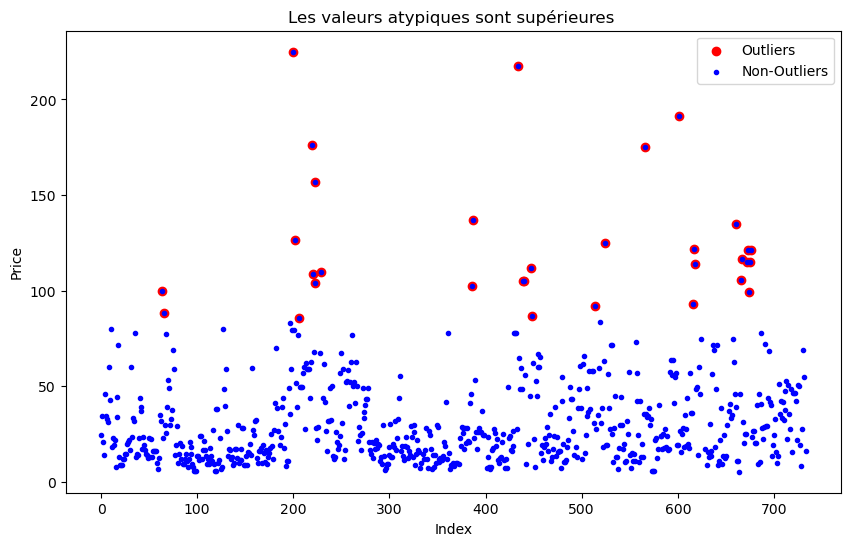

In [53]:
# Création du nuage de points pour les valeurs atypique 
plt.figure(figsize=(10, 6)) 

# Tracer le nuage de points des valeurs atypique 
plt.scatter(outliers.index, outliers['price'], color='red', marker='o', label='Outliers')

# Tracer les valeurs non aberrantes en bleu
plt.scatter(df_finale.index, df_finale['price'], color='blue', marker='.', label='Non-Outliers')

# Ajouter des étiquettes et une légende
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Les valeurs atypiques sont supérieures ')
plt.legend()



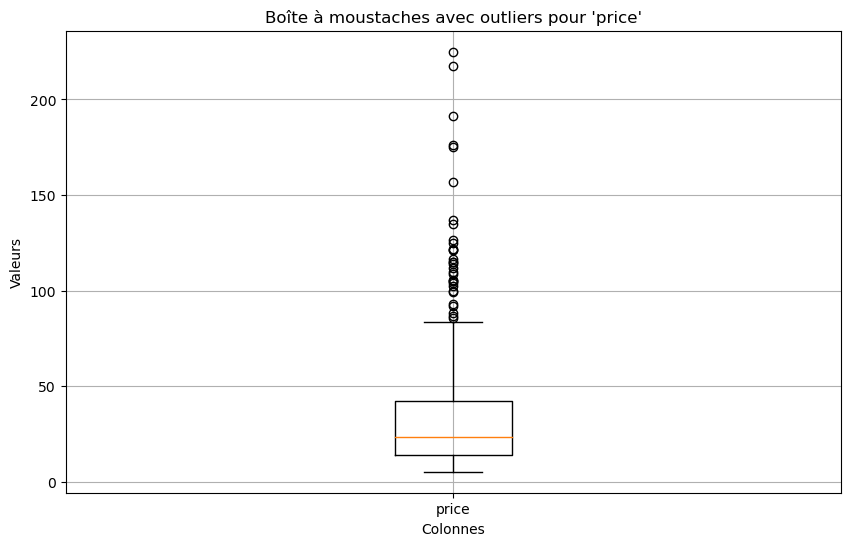

In [62]:
# Créer un boxplot des colonnes 'price' mise en évidence des outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df_finale['price'], labels=['price'], showfliers=True)
plt.title("Boîte à moustaches avec outliers pour 'price'")
plt.xlabel("Colonnes")
plt.ylabel("Valeurs")
plt.grid(True)

In [55]:
#Incohérences valeurs uniques de stock_quantity
unique = df_finale['stock_quantity'].unique()
print(unique)

[  0  15  34  12  66  36  22  46  41  35  16 112 267  73  60  10  27  65
  31 157  98  28  11  50  54  53  48  14  37  45  24  19  26  43   7   6
  42   5   1   8  33  18  17  57 128  70  58 167 100  94 276 109  47 137
  90  99 209  55  13 105 190  69  89 195 578   2  83 180  20  49  85 141
  25  64 102  21  56   4 133   3  96   9  61  39 237 114 106  23  32  93
 161  30 178  29 151 140  76  97 163  62 257 284 168 143  92  88  44  95
 289  72 203 129  38  63 130  51 123  -1 118 101  84 132 211 124 120 363
  40]


In [56]:
# Supprimer les lignes avec des valeurs négatives dans la colonne 'stock_quantity'
df_finale = df_finale[df_finale['stock_quantity'] >= 0]

In [57]:
# Calculer les Z-scores pour 'price'
z_scores_price = stats.zscore(df_finale['price'])

# Créer nouvelle colonne dans le DataFrame pour stocker les Z-scores
df_finale['z_score_price'] = z_scores_price

# Afficher le DataFrame df_erp avec les colonnes de Z-scores
df_finale

C:\Users\33621\AppData\Local\Temp\ipykernel_21992\2959702316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['z_score_price'] = z_scores_price


,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_type,chiffre_affaires,z_score_price
0,3847,1,24.2,0,outofstock,15298,6.0,product,145.2,-0.297635
1,3849,1,34.3,0,outofstock,15296,0.0,product,0.0,0.065585
2,3850,1,20.8,0,outofstock,15300,0.0,product,0.0,-0.419907
3,4032,1,14.1,0,outofstock,19814,3.0,product,42.3,-0.660854
4,4039,1,46.0,0,outofstock,19815,0.0,product,0.0,0.486344
...,...,...,...,...,...,...,...,...,...,...
728,6930,1,8.4,83,instock,16135,5.0,product,42.0,-0.865839
729,7023,1,27.5,15,instock,15891,0.0,product,0.0,-0.178959
730,7025,1,69.0,2,instock,15887,0.0,product,0.0,1.313477
731,7247,1,54.8,23,instock,13127-1,0.0,product,0.0,0.802812


In [58]:
# Calculer les quartiles des Z-scores de 'price' pour diviser en 4 gammes de prix
quartiles = np.percentile(df_finale['z_score_price'], [25, 50, 75])

# Définir les bornes des gammes de prix en fonction des quartiles
borne_inf = quartiles[0]
borne_moyenne_inf = quartiles[1]
borne_moyenne_sup = quartiles[2]
borne_sup = np.inf  # inclure toutes les valeurs supérieures au 3e quartile

# Créer une fonction pour attribuer une gamme de prix en fonction du Z-score
def attribuer_gamme_prix(z_score):
    if z_score <= borne_inf:
        return 'Gamme de prix inférieure'
    elif borne_inf < z_score <= borne_moyenne_inf:
        return 'Gamme de prix moyenne inférieure'
    elif borne_moyenne_inf < z_score <= borne_moyenne_sup:
        return 'Gamme de prix moyenne supérieure'
    else:
        return 'Gamme de prix supérieure'

# Appliquer la fonction pour attribuer une gamme de prix à chaque ligne
df_finale['gamme_prix'] = df_finale[''].apply(attribuer_gamme_prix)z_score_price

# Calculer les prix minimaux et maximaux de chaque gamme de prix
prix_min_par_gamme = df_finale.groupby('gamme_prix')['price'].min()
prix_max_par_gamme = df_finale.groupby('gamme_prix')['price'].max()

# Afficher les prix de chaque gamme en euros
for gamme, prix_min, prix_max in zip(prix_min_par_gamme.index, prix_min_par_gamme, prix_max_par_gamme):
    print(f"{gamme}: {prix_min} - {prix_max if prix_max != np.inf else 'plus'}")

Gamme de prix inférieure: 5.2 - 14.1
Gamme de prix moyenne inférieure: 14.3 - 23.5
Gamme de prix moyenne supérieure: 23.6 - 42.1
Gamme de prix supérieure: 42.2 - 225.0


C:\Users\33621\AppData\Local\Temp\ipykernel_21992\3235140259.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['gamme_prix'] = df_finale['z_score_price'].apply(attribuer_gamme_prix)


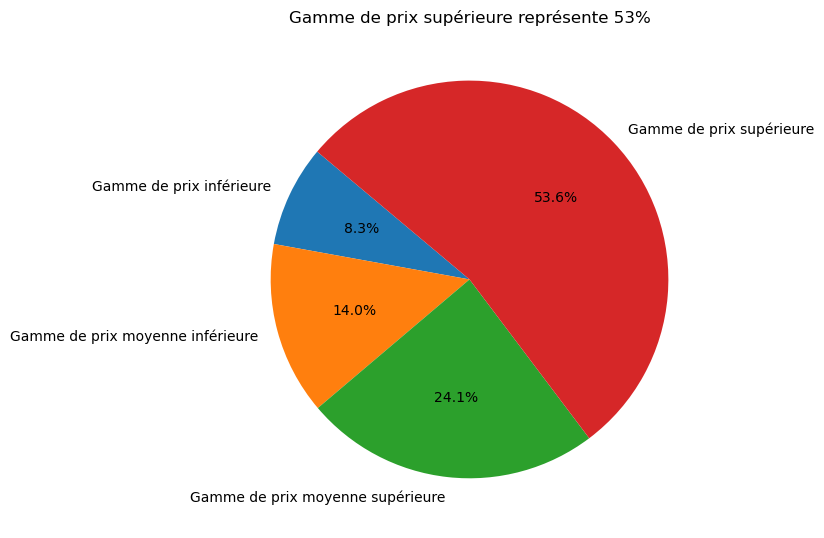

In [59]:
# Utiliser groupby pour regrouper les données par gamme de prix et calculer la somme du chiffre d'affaires dans chaque groupe
chiffre_affaires_par_gamme = df_finale.groupby('gamme_prix')['price'].sum()

# Créer un diagramme circulaire (camembert) pour visualiser le chiffre d'affaires par gamme de prix
plt.figure(figsize=(8, 8))
plt.pie(chiffre_affaires_par_gamme, labels=chiffre_affaires_par_gamme.index, autopct='%1.1f%%', startangle=140)
plt.title('Gamme de prix supérieure représente 53%')
plt.tight_layout()

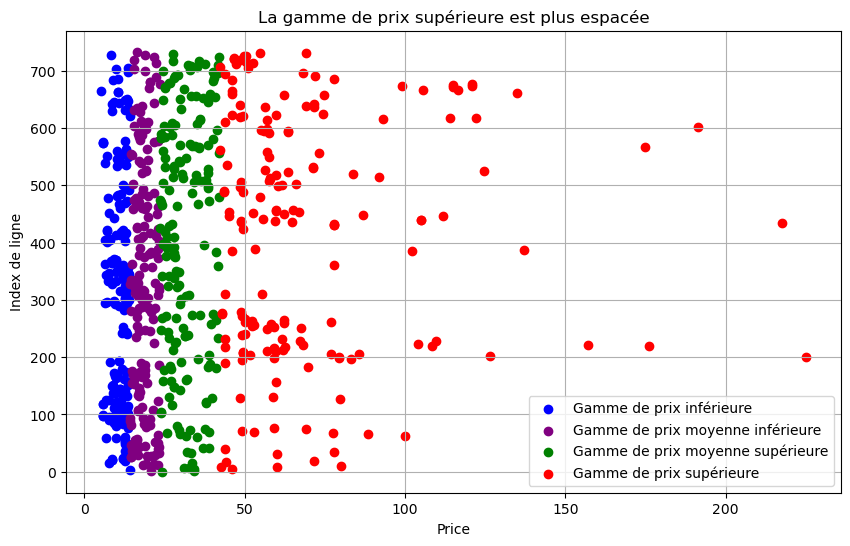

In [60]:
# Créer un scatter plot des 'price' en fonction de 'gamme_prix'
plt.figure(figsize=(10, 6))
colors = {'Gamme de prix inférieure': 'blue', 'Gamme de prix moyenne inférieure': 'purple',
          'Gamme de prix moyenne supérieure': 'green', 'Gamme de prix supérieure': 'red'}

for gamme, color in colors.items():
    subset = df_finale[df_finale['gamme_prix'] == gamme]
    plt.scatter(subset['price'], subset.index, label=gamme, c=color, marker='o')

plt.title("La gamme de prix supérieure est plus espacée")
plt.xlabel("Price")
plt.ylabel("Index de ligne")
plt.grid(True)
plt.legend()

Conclusion:
On constate que les oultiers sont dans la partie supérieure peut importe la méthode de détection avec des tarifs bien supérieure, ce sont des valeurs atypiques à ne pas exclure de la BDD cohérentes avec le marché on peut proposer de créer une section spéciale ‘LUXE’ pour ce type de bouteille.